In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv(r"aug_test.csv")
df.head()   

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [7]:
df.shape

(2129, 13)

In [4]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,2129.0,0.824984,0.125074,0.448,0.698,0.903,0.92,0.949
experience,2129.0,10.098638,6.851499,0.000,4.000,9.000,16.00,21.000
last_new_job,2129.0,2.014361,1.636859,0.000,1.000,1.000,3.00,5.000
training_hours,2129.0,64.983091,60.238660,1.000,23.000,47.000,86.00,334.000


In [9]:
df.drop("enrollee_id",axis=1,inplace=True)

In [76]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2129 non-null   object 
 1   city_development_index  2129 non-null   float64
 2   gender                  2129 non-null   object 
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2129 non-null   object 
 5   education_level         2129 non-null   object 
 6   major_discipline        2129 non-null   object 
 7   experience              2129 non-null   float64
 8   company_size            2129 non-null   object 
 9   company_type            2129 non-null   object 
 10  last_new_job            2129 non-null   float64
 11  training_hours          2129 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 199.7+ KB


In [11]:
df["gender"].value_counts()

gender
Male      1460
Female     137
Other       24
Name: count, dtype: int64

In [12]:
df["gender"] = df["gender"].fillna("Unknown")

In [23]:
df["enrolled_university"].value_counts()

enrolled_university
no_enrollment       1519
Full time course     435
Part time course     144
Name: count, dtype: int64

In [24]:
df["enrolled_university"]=df["enrolled_university"].fillna("Unknown")

In [26]:
df["education_level"]=df["education_level"].fillna("Unknown")

In [33]:
df["major_discipline"].value_counts()

major_discipline
STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: count, dtype: int64

In [34]:
df["major_discipline"] = df["major_discipline"].fillna("Unknown")



In [41]:
df["experience"].value_counts()

experience
21.0    383
5.0     163
3.0     154
4.0     145
6.0     130
2.0     128
7.0     116
9.0     113
10.0     96
11.0     86
8.0      82
0.5      74
16.0     68
15.0     59
1.0      56
14.0     55
13.0     54
12.0     52
17.0     36
19.0     29
18.0     26
20.0     19
Name: count, dtype: int64

In [40]:
def ex(x):
    if x == ">20":
        return 21.0
    elif x == "<1":
        return 0.5
    else:
        return float(x)
df["experience"] = df["experience"].apply(ex)

In [42]:
df["experience"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2129 entries, 0 to 2128
Series name: experience
Non-Null Count  Dtype  
--------------  -----  
2124 non-null   float64
dtypes: float64(1)
memory usage: 16.8 KB


In [44]:
df["experience"].fillna(0,inplace=True)


C:\Users\MoHamed\AppData\Local\Temp\ipykernel_18224\149026894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["experience"].fillna(0,inplace=True)


In [51]:
df["company_size"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 2129 entries, 0 to 2128
Series name: company_size
Non-Null Count  Dtype 
--------------  ----- 
1507 non-null   object
dtypes: object(1)
memory usage: 16.8+ KB


In [52]:
df["company_size"].fillna(df["company_size"].mode()[0],inplace=True)

In [54]:
df["company_type"].fillna("Unkown",inplace=True)

C:\Users\MoHamed\AppData\Local\Temp\ipykernel_18224\3255193359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["company_type"].fillna("Unkown",inplace=True)


In [59]:
df["last_new_job"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2129 entries, 0 to 2128
Series name: last_new_job
Non-Null Count  Dtype 
--------------  ----- 
2089 non-null   object
dtypes: object(1)
memory usage: 16.8+ KB


In [69]:
df["last_new_job"].unique()

array(['1', 0, 5, '2', '4', '3', nan], dtype=object)

In [62]:
df["last_new_job"]=df["last_new_job"].apply(lambda x: 5 if x==">4" else(0 if x=="never" else x) )

In [72]:
df['last_new_job'] = pd.to_numeric(df['last_new_job'])

In [73]:
df['last_new_job'].dtype

dtype('float64')

In [75]:
df['last_new_job'].fillna(df['last_new_job'].mean(),inplace=True)

C:\Users\MoHamed\AppData\Local\Temp\ipykernel_18224\2635151765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_new_job'].fillna(df['last_new_job'].mean(),inplace=True)


<Axes: >

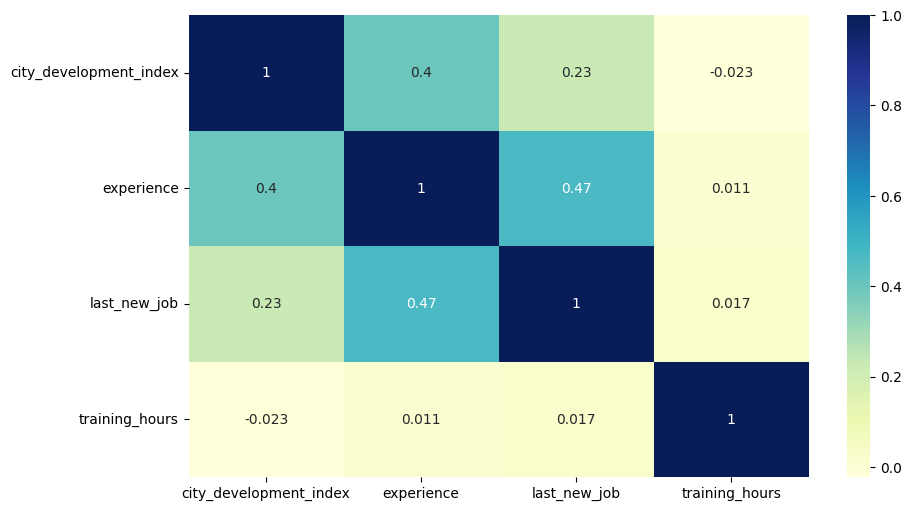

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="YlGnBu")

(array([1460.,    0.,    0.,  137.,    0.,    0.,  508.,    0.,    0.,
          24.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

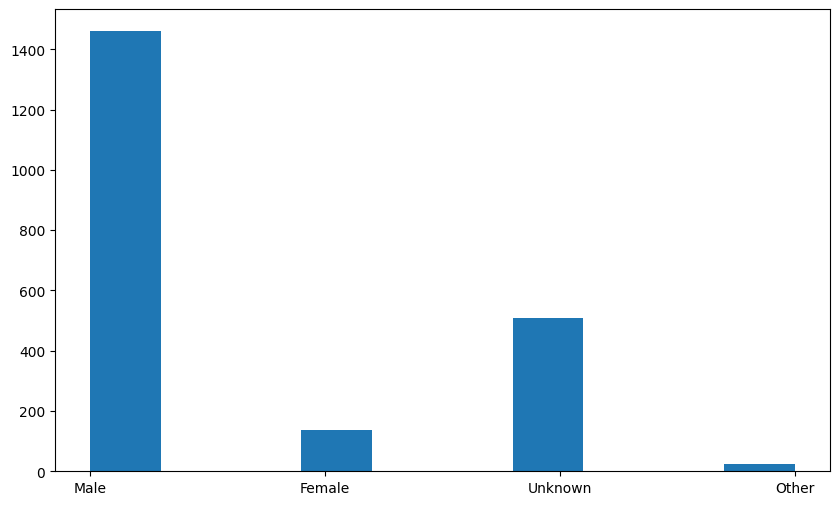

In [81]:
plt.figure(figsize=(10,6))
plt.hist(df["gender"])

In [89]:
exp=df.groupby(df["gender"])["experience"].mean().reset_index()

<BarContainer object of 4 artists>

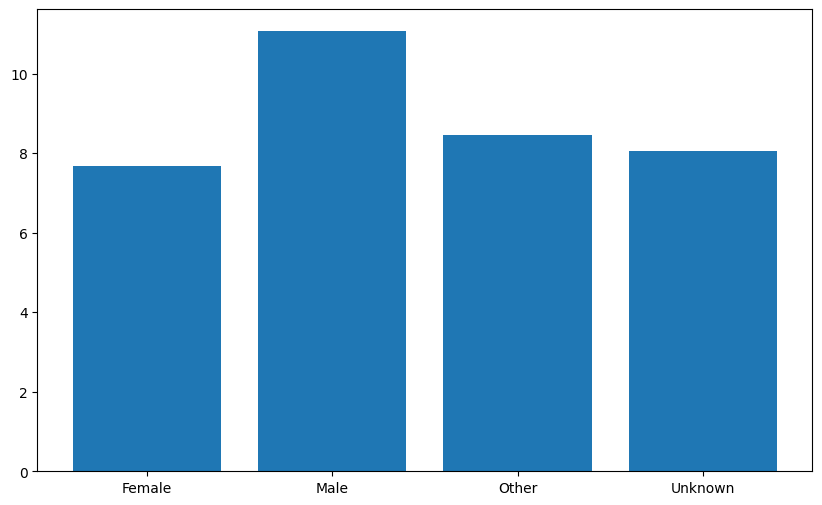

In [90]:
plt.figure(figsize=(10,6))
plt.bar(exp["gender"],exp["experience"])


In [93]:
df.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [94]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,<10,Unkown,1.0,21
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,Pvt Ltd,1.0,98
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Unknown,0.5,50-99,Pvt Ltd,0.0,15
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,10/49,Pvt Ltd,1.0,39
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,10000+,Pvt Ltd,5.0,72


In [106]:
city_counts = df['city'].value_counts().reset_index()
city_counts

,city,count
0,city_103,473
1,city_21,318
2,city_16,168
3,city_114,155
4,city_160,113
...,...,...
103,city_117,1
104,city_157,1
105,city_180,1
106,city_84,1


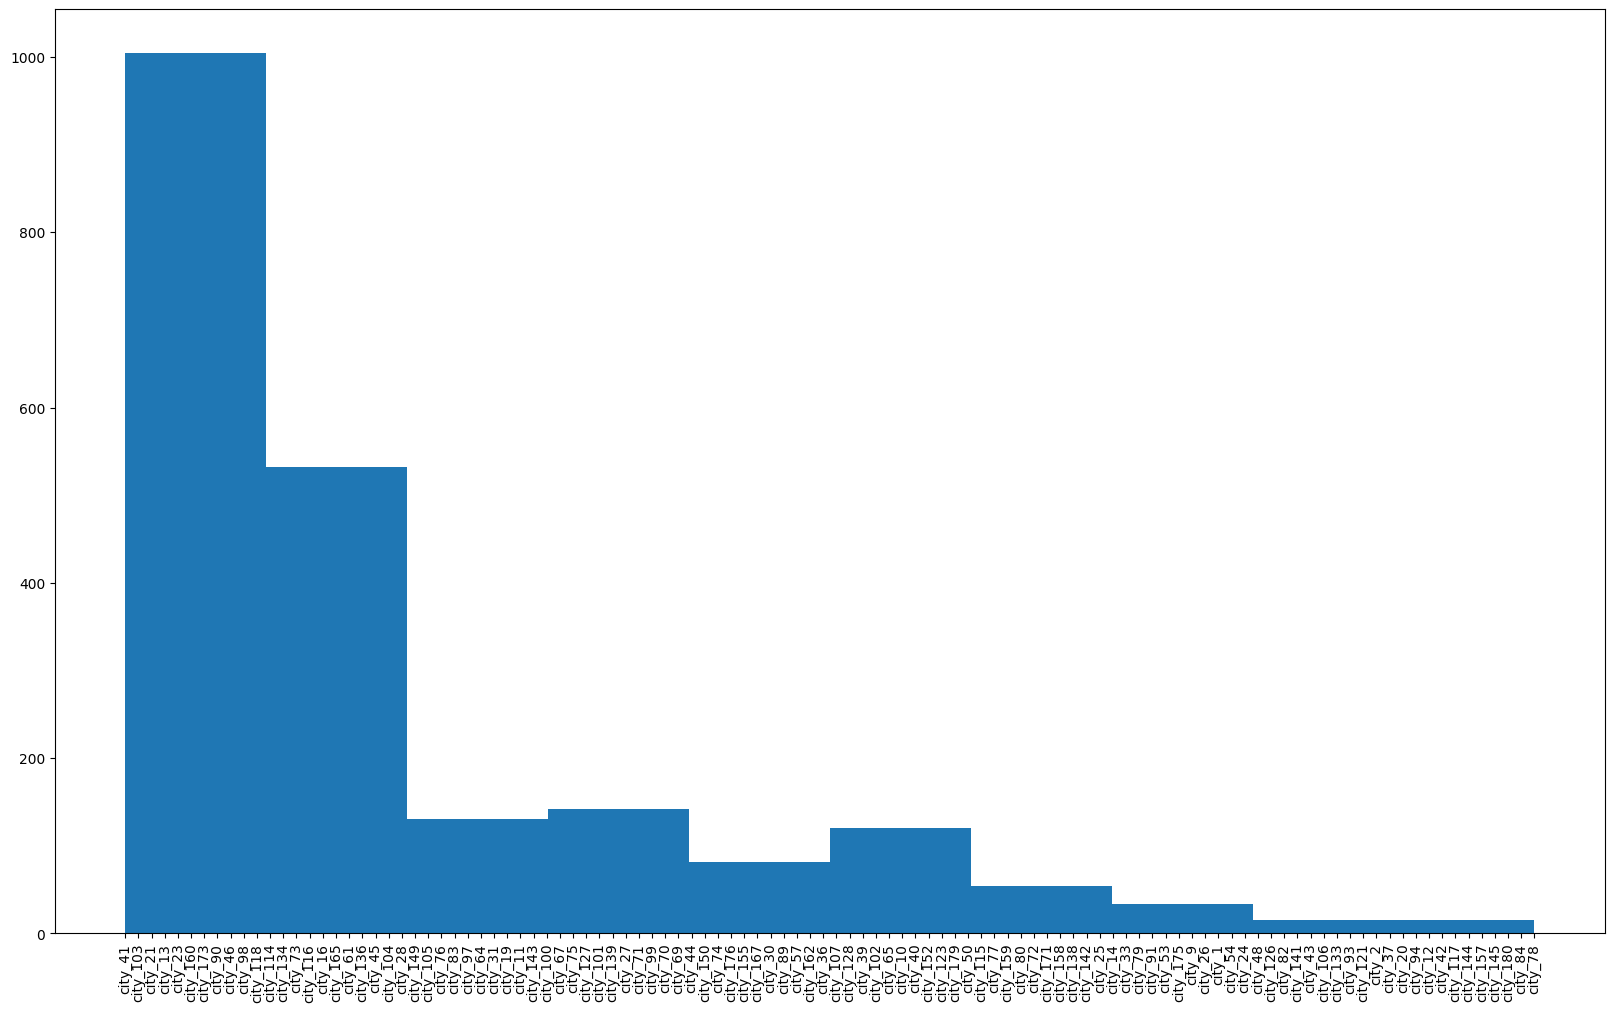

In [109]:
plt.figure(figsize=(20,12))
plt.hist(df["city"])
plt.xticks(rotation=90)
plt.show()

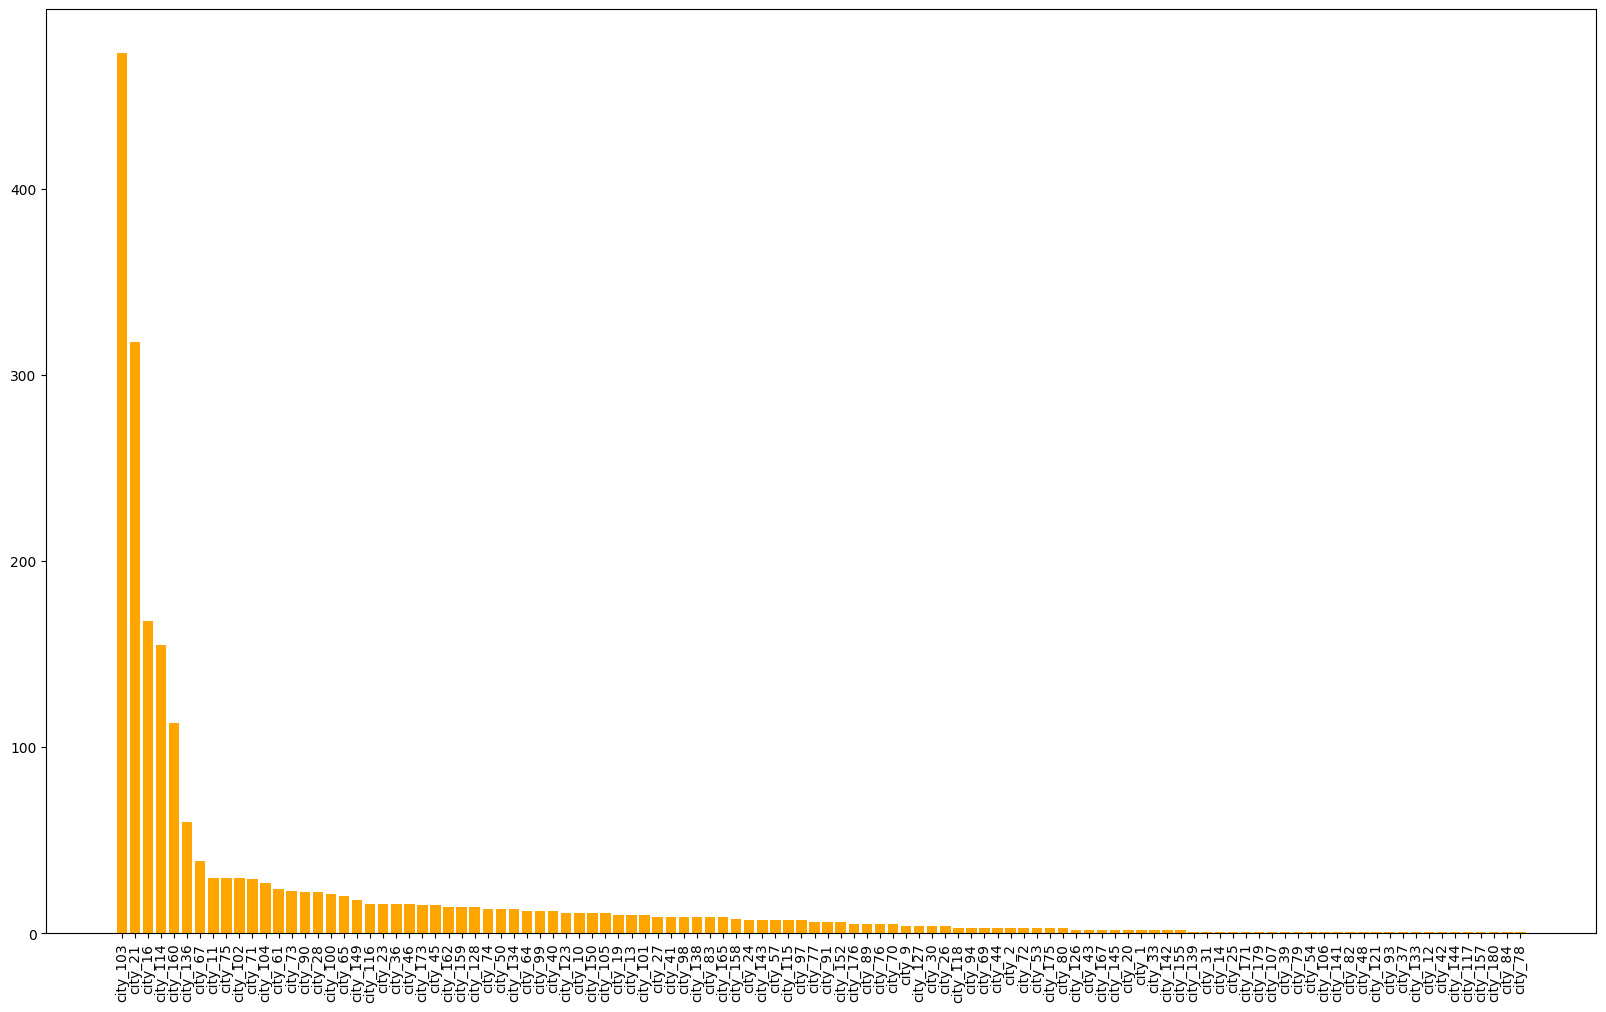

In [115]:
plt.figure(figsize=(20,12))
plt.bar(city_counts["city"],city_counts["count"],color='orange')
plt.xticks(rotation=90)
plt.show()

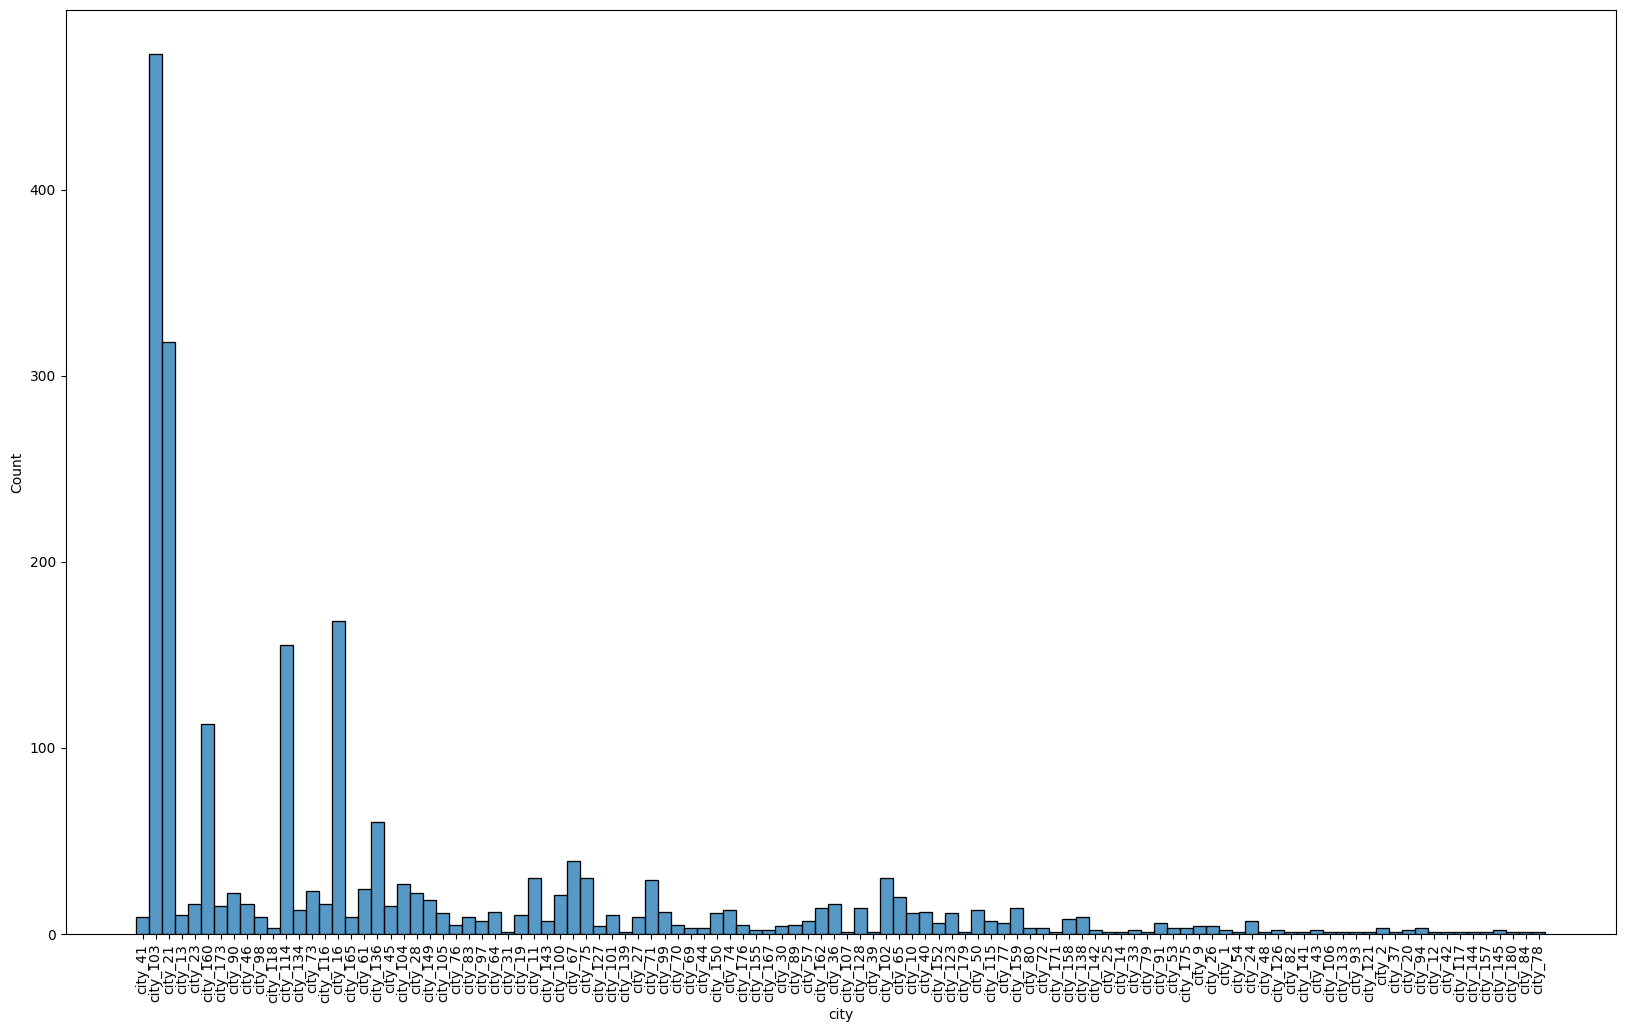

In [116]:
plt.figure(figsize=(20,12))
sns.histplot(df["city"])
plt.xticks(rotation=90)
plt.show()

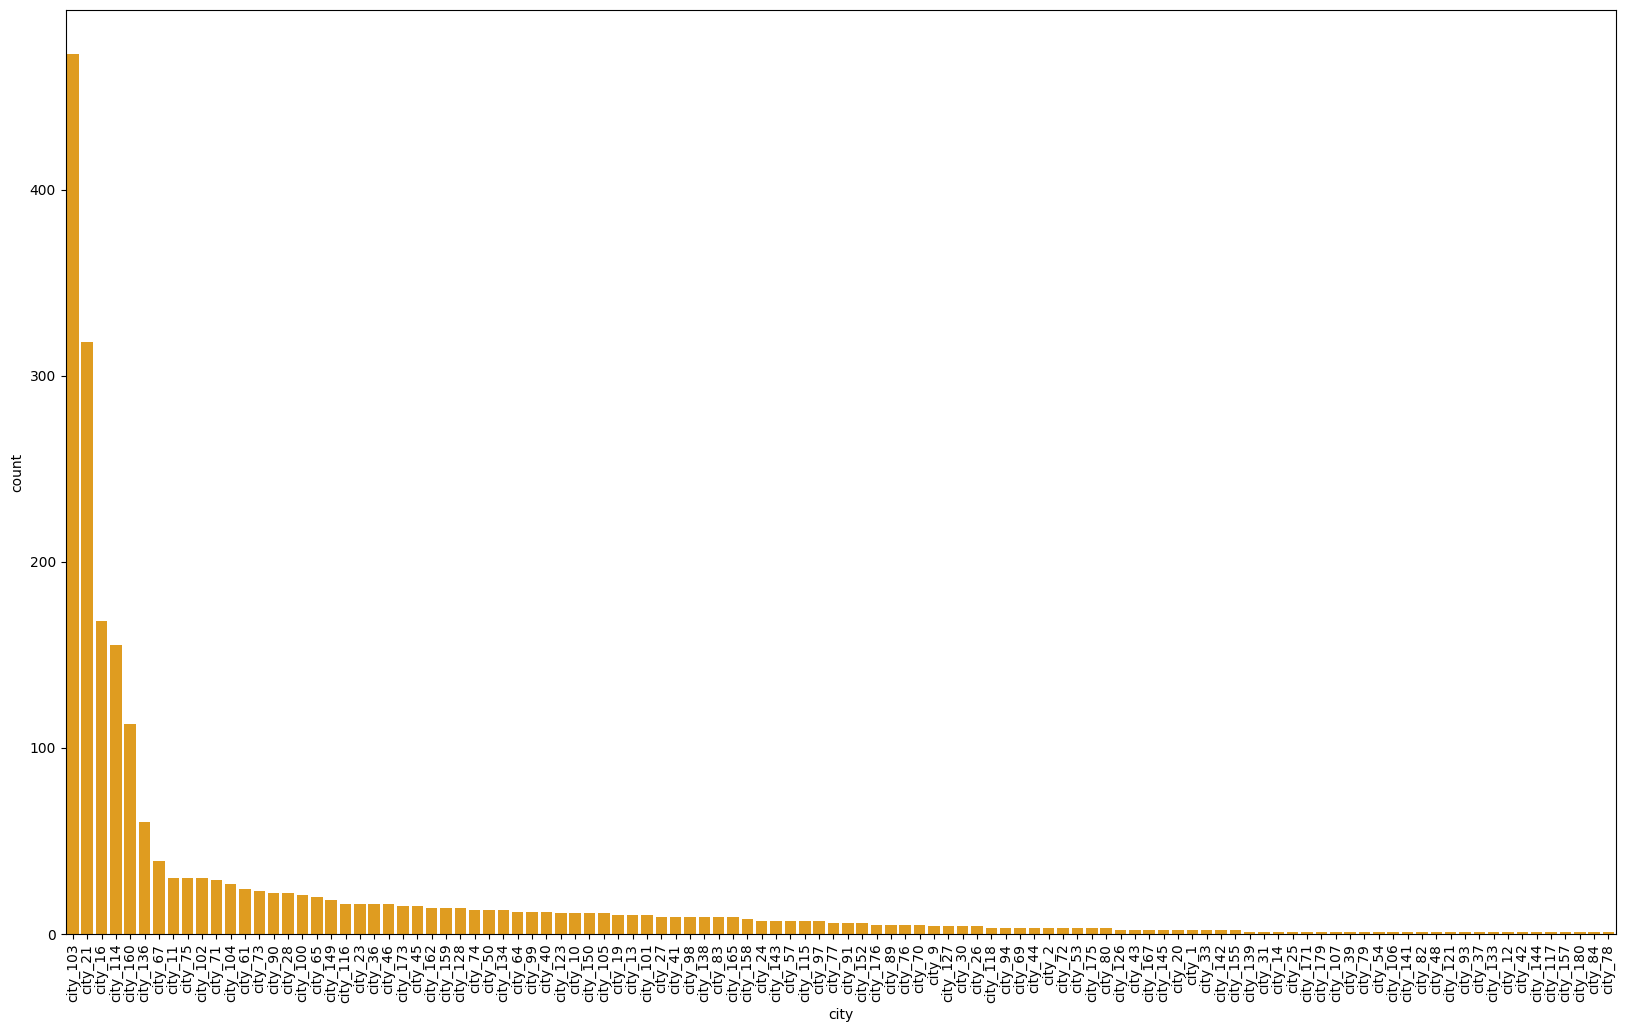

In [118]:
city_counts.columns = ['city', 'count']

plt.figure(figsize=(20,12))
sns.barplot(x="city", y="count", data=city_counts, color="orange")
plt.xticks(rotation=90)
plt.show()

In [120]:
df.skew(numeric_only=True )

city_development_index   -0.923030
experience                0.412426
last_new_job              0.796057
training_hours            1.876451
dtype: float64

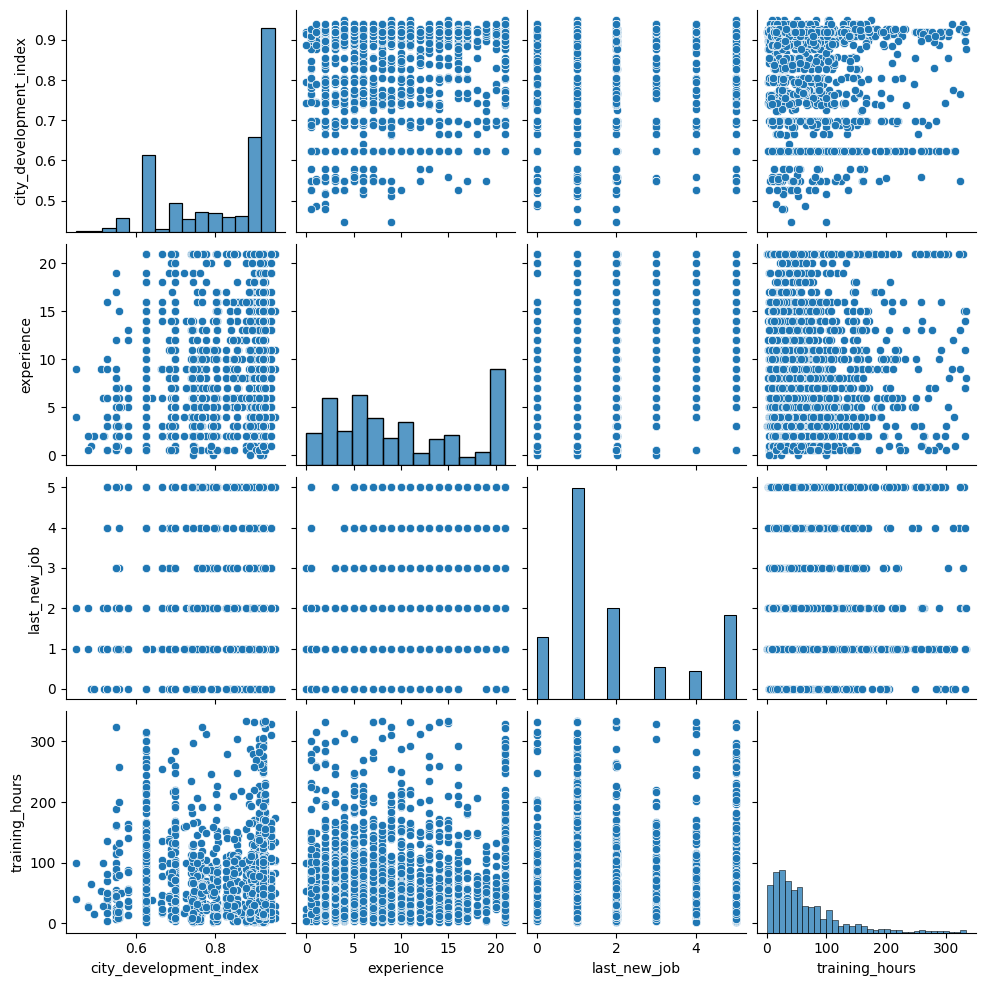

In [121]:
sns.pairplot(df)

In [122]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,<10,Unkown,1.0,21
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,Pvt Ltd,1.0,98
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Unknown,0.5,50-99,Pvt Ltd,0.0,15
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,10/49,Pvt Ltd,1.0,39
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,10000+,Pvt Ltd,5.0,72


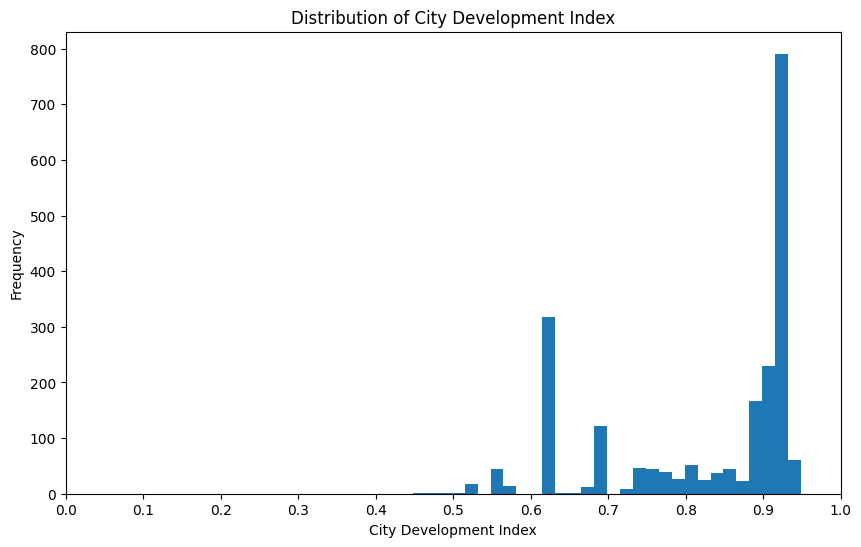

In [133]:
plt.figure(figsize=(10,6))
plt.hist(df['city_development_index'],bins=30)
plt.xlabel("City Development Index")
plt.ylabel("Frequency")
plt.title("Distribution of City Development Index")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

In [141]:
hour=df.groupby(df["gender"])["training_hours"].sum().reset_index()

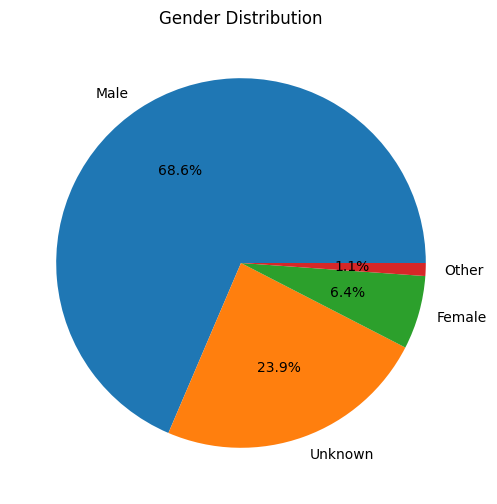

In [138]:
plt.figure(figsize=(10,6))
gender_counts = df["gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

<BarContainer object of 4 artists>

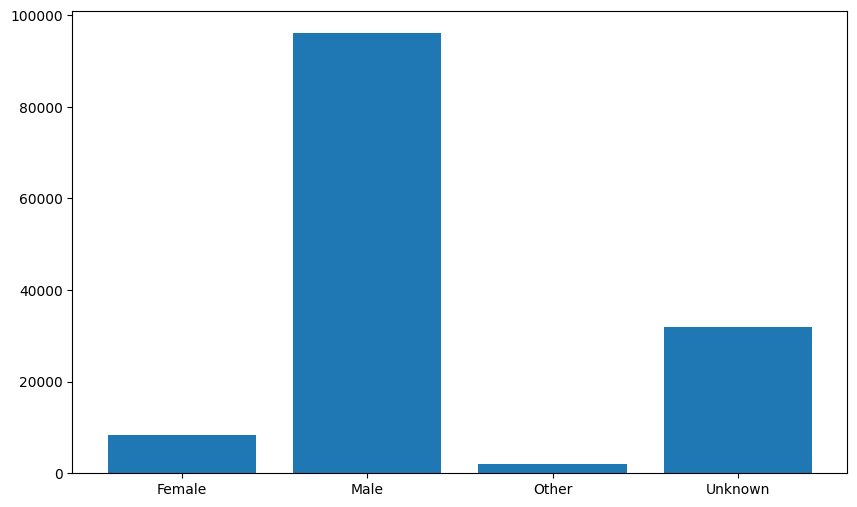

In [145]:
plt.figure(figsize=(10,6))
plt.bar(hour["gender"],hour["training_hours"])  
 

In [146]:
st=df["education_level"].value_counts()

([<matplotlib.patches.Wedge at 0x1aa95cd5750>,
 [Text(-0.3269256385971037, 1.0502950189484268, 'Graduate'),
  Text(-0.25651354621286265, -1.0696732214135782, 'Masters'),
  Text(0.8073554219678596, -0.7471125903229711, 'High School'),
  Text(1.0372529727623712, -0.36620523002221606, 'Phd'),
  Text(1.0816370896484768, -0.20015295725213086, 'Unknown'),
  Text(1.098448273982413, -0.058407100467818676, 'Primary School')],
 [Text(-0.17832307559842017, 0.5728881921536872, '59.6%'),
  Text(-0.1399164797524705, -0.5834581207710425, '23.3%'),
  Text(0.44037568470974153, -0.40751595835798415, '10.4%'),
  Text(0.5657743487794751, -0.1997483072848451, '2.5%'),
  Text(0.5899838670809873, -0.1091743403193441, '2.4%'),
  Text(0.5991536039904071, -0.031858418436992, '1.7%')])

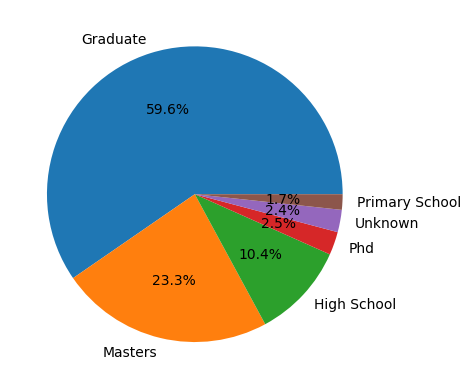

In [147]:
plt.pie(st, labels=st.index, autopct='%1.1f%%') 

<Axes: >

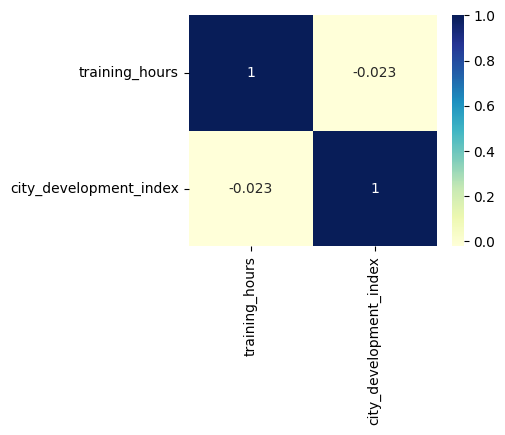

In [154]:
plt.figure(figsize=(4,3))
sns.heatmap(df[["training_hours","city_development_index"]].corr(),annot=True,cmap="YlGnBu")